# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:29:33.954268: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:29:37.474204
2025-04-14 21:29:37.474204


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 4
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:29:31"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

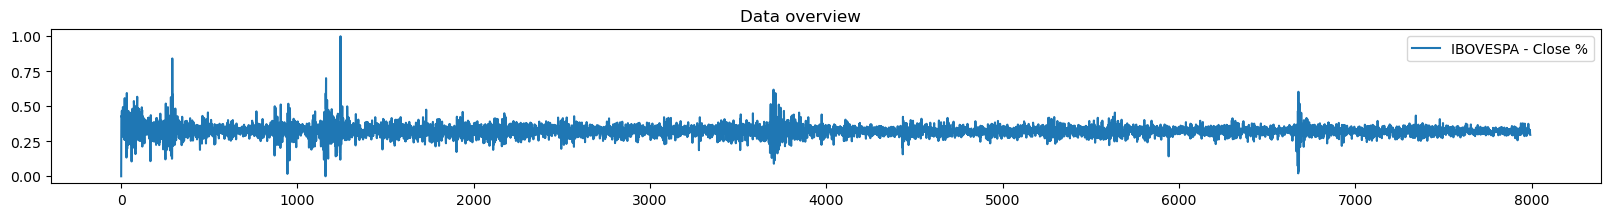

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

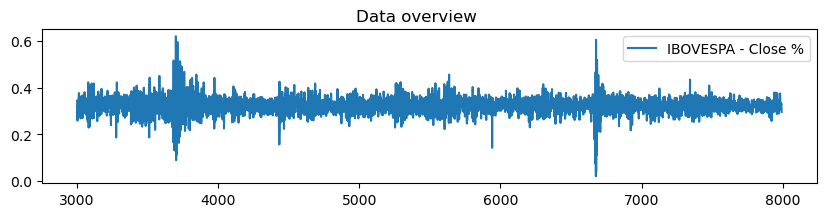

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

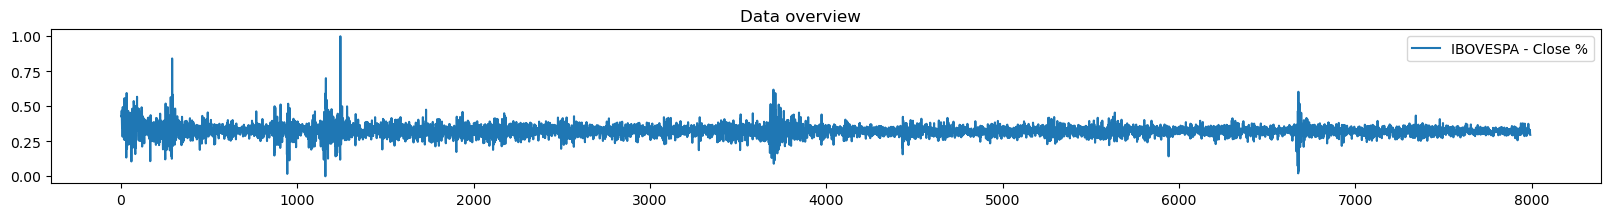

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

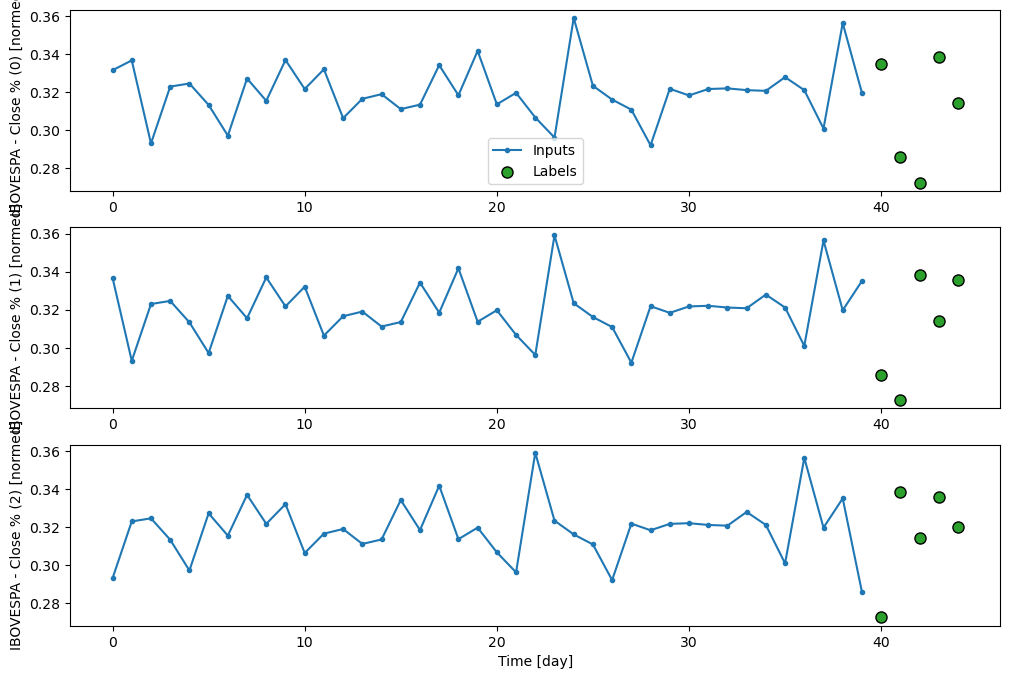

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:15 3s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 89.6152 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3331  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.4073 - mean_absolute_error: 0.4073 - mean_absolute_percentage_error: 121.4291 - mean_squared_error: 0.2703 - root_mean_squared_error: 0.4850

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 130.6789 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5302

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4304 - mean_absolute_error: 0.4304 - mean_absolute_percentage_error: 131.1186 - mean_squared_error: 0.3160 - root_mean_squared_error: 0.5404

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4255 - mean_absolute_error: 0.4255 - mean_absolute_percentage_error: 130.0566 - mean_squared_error: 0.3108 - root_mean_squared_error: 0.5396

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4178 - mean_absolute_error: 0.4178 - mean_absolute_percentage_error: 127.9395 - mean_squared_error: 0.3014 - root_mean_squared_error: 0.5335

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4068 - mean_absolute_error: 0.4068 - mean_absolute_percentage_error: 124.7160 - mean_squared_error: 0.2901 - root_mean_squared_error: 0.5244

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3950 - mean_absolute_error: 0.3950 - mean_absolute_percentage_error: 121.2307 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5142

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.3837 - mean_absolute_error: 0.3837 - mean_absolute_percentage_error: 117.8659 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.5039

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 114.5128 - mean_squared_error: 0.2569 - root_mean_squared_error: 0.4936

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3616 - mean_absolute_error: 0.3616 - mean_absolute_percentage_error: 111.2229 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4836

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 108.1365 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4740

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 105.2395 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4649

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3329 - mean_absolute_error: 0.3329 - mean_absolute_percentage_error: 102.5679 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4562

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3245 - mean_absolute_error: 0.3245 - mean_absolute_percentage_error: 100.1277 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4479

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 97.8311 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4401 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3091 - mean_absolute_error: 0.3091 - mean_absolute_percentage_error: 8777.0469 - mean_squared_error: 0.2009 - root_mean_squared_error: 0.4326

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3022 - mean_absolute_error: 0.3022 - mean_absolute_percentage_error: 24057.9766 - mean_squared_error: 0.1950 - root_mean_squared_error: 0.4256

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2957 - mean_absolute_error: 0.2957 - mean_absolute_percentage_error: 36994.9453 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4190

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 48003.9570 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4126

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 57413.7852 - mean_squared_error: 0.1795 - root_mean_squared_error: 0.4066

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 65487.0703 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.4008

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 72435.6484 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3952

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 78431.8750 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3899

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 83617.1016 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3848

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 88108.1172 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3799

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 92002.0938 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3752

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 95380.3438 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3707

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 98311.3359 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3663

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 100853.0234 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3621

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 103054.7031 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3581

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 104958.4922 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3542

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 106600.5469 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3504

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 108012.0312 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3468

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 109219.8906 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3432

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2216 - mean_absolute_error: 0.2216 - mean_absolute_percentage_error: 110247.5234 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3398

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 111115.2969 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3365

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2157 - mean_absolute_error: 0.2157 - mean_absolute_percentage_error: 111841.0312 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3333

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 112440.3281 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3302

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 112926.8906 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3271

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 113312.8203 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3242

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2051 - mean_absolute_error: 0.2051 - mean_absolute_percentage_error: 113608.7734 - mean_squared_error: 0.1181 - root_mean_squared_error: 0.3213

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 113824.2031 - mean_squared_error: 0.1163 - root_mean_squared_error: 0.3186

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 113967.5000 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3159

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 114046.1172 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3132

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 114066.6953 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3107

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 114035.1641 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3082

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 113956.8359 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3057

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 113836.4531 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.3034

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 113678.2812 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3010

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 113486.1484 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2988

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 113263.5078 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2966

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 113013.4531 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2944

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 112738.7969 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2923

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1781 - mean_absolute_error: 0.1781 - mean_absolute_percentage_error: 112442.0625 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2903

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1764 - mean_absolute_error: 0.1764 - mean_absolute_percentage_error: 112125.5469 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2883

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 111791.3125 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2863

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1732 - mean_absolute_error: 0.1732 - mean_absolute_percentage_error: 111441.2578 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2844

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 111077.0625 - mean_squared_error: 0.0942 - root_mean_squared_error: 0.2825

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 110700.2812 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2807

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 110312.3203 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2789

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 109914.4609 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2771

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1658 - mean_absolute_error: 0.1658 - mean_absolute_percentage_error: 109507.8516 - mean_squared_error: 0.0901 - root_mean_squared_error: 0.2754

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 109093.5547 - mean_squared_error: 0.0891 - root_mean_squared_error: 0.2737

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1630 - mean_absolute_error: 0.1630 - mean_absolute_percentage_error: 108672.5469 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2720

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1617 - mean_absolute_error: 0.1617 - mean_absolute_percentage_error: 108245.6953 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2704

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1604 - mean_absolute_error: 0.1604 - mean_absolute_percentage_error: 107813.8047 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2688

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 107377.6094 - mean_squared_error: 0.0855 - root_mean_squared_error: 0.2673

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1579 - mean_absolute_error: 0.1579 - mean_absolute_percentage_error: 106937.7734 - mean_squared_error: 0.0846 - root_mean_squared_error: 0.2657

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 106494.9062 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2642

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1554 - mean_absolute_error: 0.1554 - mean_absolute_percentage_error: 106049.5703 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2627

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1543 - mean_absolute_error: 0.1543 - mean_absolute_percentage_error: 105602.2656 - mean_squared_error: 0.0821 - root_mean_squared_error: 0.2613

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 105153.4531 - mean_squared_error: 0.0814 - root_mean_squared_error: 0.2598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1520 - mean_absolute_error: 0.1520 - mean_absolute_percentage_error: 104703.5703 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2584

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 104253.0000 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2571

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 103802.0859 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2557

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 103351.1562 - mean_squared_error: 0.0784 - root_mean_squared_error: 0.2544

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 102900.5156 - mean_squared_error: 0.0777 - root_mean_squared_error: 0.2530

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 102450.4141 - mean_squared_error: 0.0770 - root_mean_squared_error: 0.2518

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 102001.1094 - mean_squared_error: 0.0763 - root_mean_squared_error: 0.2505

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1447 - mean_absolute_error: 0.1447 - mean_absolute_percentage_error: 101552.8281 - mean_squared_error: 0.0756 - root_mean_squared_error: 0.2492

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 101105.7578 - mean_squared_error: 0.0750 - root_mean_squared_error: 0.2480

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 100660.1016 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2468

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1418 - mean_absolute_error: 0.1418 - mean_absolute_percentage_error: 100216.0156 - mean_squared_error: 0.0737 - root_mean_squared_error: 0.2456

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 99773.6562 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2444 

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 99333.1641 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2433

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 98894.6641 - mean_squared_error: 0.0719 - root_mean_squared_error: 0.2421

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 98458.2656 - mean_squared_error: 0.0713 - root_mean_squared_error: 0.2410

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 98024.0781 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2399

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - mean_absolute_percentage_error: 97592.1875 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2388

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 97162.6797 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2377

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1349 - mean_absolute_error: 0.1349 - mean_absolute_percentage_error: 96735.6250 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2367

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 96311.0938 - mean_squared_error: 0.0686 - root_mean_squared_error: 0.2356

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 95889.1406 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2346

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 95469.8281 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2336

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1317 - mean_absolute_error: 0.1317 - mean_absolute_percentage_error: 95053.1875 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2326

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 94639.2656 - mean_squared_error: 0.0665 - root_mean_squared_error: 0.2316

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 94228.1016 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2306

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 93819.7188 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2297

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 93414.1406 - mean_squared_error: 0.0651 - root_mean_squared_error: 0.2287

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1280 - mean_absolute_error: 0.1280 - mean_absolute_percentage_error: 93011.3984 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2278

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 92611.5000 - mean_squared_error: 0.0642 - root_mean_squared_error: 0.2269

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 92214.4609 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2259

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 91820.2969 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2250

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1253 - mean_absolute_error: 0.1253 - mean_absolute_percentage_error: 91429.0078 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2242

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 91040.6016 - mean_squared_error: 0.0624 - root_mean_squared_error: 0.2233

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1240 - mean_absolute_error: 0.1240 - mean_absolute_percentage_error: 90655.0859 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2224

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 90272.4453 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2216

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 89892.6953 - mean_squared_error: 0.0612 - root_mean_squared_error: 0.2207

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 89515.8203 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2199

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1215 - mean_absolute_error: 0.1215 - mean_absolute_percentage_error: 89141.8125 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2191

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 88770.6641 - mean_squared_error: 0.0600 - root_mean_squared_error: 0.2183

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1203 - mean_absolute_error: 0.1203 - mean_absolute_percentage_error: 88402.3750 - mean_squared_error: 0.0596 - root_mean_squared_error: 0.2175

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1197 - mean_absolute_error: 0.1197 - mean_absolute_percentage_error: 88036.9297 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2167

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1191 - mean_absolute_error: 0.1191 - mean_absolute_percentage_error: 87674.3203 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2159

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 87314.5234 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2151

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 86957.5234 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2143

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 86429.3438 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2132 - val_loss: 0.0137 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 4.1939 - val_mean_squared_error: 2.9383e-04 - val_root_mean_squared_error: 0.0171 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 71ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 28.3370 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 26.1930 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1017 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.2592 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 23.2213 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0920

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 23.3974 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.1379 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0910

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.6606 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.1270 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.5686 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0859

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.0235 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.4885 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 19.9738 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.4989 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0794

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.0962 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0781

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8309 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6734 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0761

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5144 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 8635.3418 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 23804.8086 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 36647.6094 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 47576.6562 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 56918.3047 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 64933.2461 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 71831.7500 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 77784.8984 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 82933.0000 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 87391.9766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 91258.2891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 94612.6484 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 97523.0234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 100046.9375 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 102233.3203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 104123.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 105754.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 107156.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 108356.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 109377.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 110239.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 110960.7031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 111556.3203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 112040.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 112423.8047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 112718.2578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 112932.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 113075.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 113154.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 113175.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 113144.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 113067.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 112948.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 112792.1172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 112601.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 112381.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 112133.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111861.6406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111567.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 111253.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110922.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110575.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110214.5000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109840.9375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109456.2656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109061.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108658.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108247.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107830.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107406.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106978.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106545.9453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106109.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105670.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105228.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104785.0938 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104339.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103893.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103446.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102999.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102552.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0602

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102105.1719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101658.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101212.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100768.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100324.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99882.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594 

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99442.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99003.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98566.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98131.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97698.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97267.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96839.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96413.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95989.4609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95568.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95149.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94733.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94320.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93909.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93501.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93096.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92694.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92294.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91897.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91504.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91112.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90724.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90339.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 89956.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89577.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89200.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88826.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88455.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88087.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87721.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87359.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86999.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86642.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86288.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85764.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553 - val_loss: 0.0143 - val_mean_absolute_error: 0.0143 - val_mean_absolute_percentage_error: 4.3611 - val_mean_squared_error: 3.1675e-04 - val_root_mean_squared_error: 0.0178 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 28.2902 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1017

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 26.1598 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1019 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.2452 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 23.2426 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0920

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.4434 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0921

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1919 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.7173 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.1829 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.6231 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0860

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.0762 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.5374 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.0190 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.5397 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0794

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.1324 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0781

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 18.8617 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6982 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0761

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5344 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 8734.1855 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 24077.6309 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 37067.7266 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 48122.1172 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 57570.9023 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 65677.7734 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 72655.3984 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 78676.8203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 83883.9609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 88394.0859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 92304.7422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 95697.5703 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 98641.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 101194.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 103405.6484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 105317.9922 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 106967.5312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 108385.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 109599.0938 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 110631.6562 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 111503.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 112233.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 112835.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 113324.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 113713.0156 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 114010.8438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 114227.8125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 114372.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 114451.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 114473.1875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 114442.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 114364.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 114243.7969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 114085.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 113893.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 113670.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 113419.6562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 113144.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 112846.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 112529.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 112194.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 111843.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 111478.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 111100.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110711.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110312.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109904.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109489.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109066.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108638.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108205.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107767.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107326.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106882.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106435.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105986.7031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105536.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105085.0703 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104633.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104180.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103728.1875 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103276.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102824.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102373.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101923.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101475.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101028.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100582.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100138.6406 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99696.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99256.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98818.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98383.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97949.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97518.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97090.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96664.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96240.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95820.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95401.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94986.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94573.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94164.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93757.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93353.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92951.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92553.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92157.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91765.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91375.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90988.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90604.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90223.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89845.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89469.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89097.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88727.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88361.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87997.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87636.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87277.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86923.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86747.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551 - val_loss: 0.0139 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 4.2338 - val_mean_squared_error: 2.9984e-04 - val_root_mean_squared_error: 0.0173 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 28.3055 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1015

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 26.1013 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.1826 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 23.1816 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0914

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.3782 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0916

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.1270 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.6526 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0678 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 22.1185 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.5585 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0136 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.4764 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0821

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 19.9602 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.4797 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0738 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8106 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.6553 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4965 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 8545.1514 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 23555.8770 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 36264.2852 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 47078.9648 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 56322.8555 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 64253.9258 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 71080.2422 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 76971.0938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 82065.3125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 86477.6328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 90303.4844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 93622.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 96502.6641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 99000.1641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 101163.6641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 103034.5391 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0695

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 104648.3047 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 106035.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 107222.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 108232.9688 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 109086.1094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 109799.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 110389.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 110867.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 111247.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 111403.6172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 111654.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 111830.1953 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 111938.9531 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 111987.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 111982.0469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 111928.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 111830.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 111693.7422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 111521.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 111318.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 111086.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110828.6875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110548.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110247.2891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109927.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109592.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109241.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108877.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108502.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108116.9219 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107722.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107319.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106909.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106493.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106071.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105645.6172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105215.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104782.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104346.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104127.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103908.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103468.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103027.4688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102585.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102143.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101700.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101257.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100815.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100374.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99933.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99494.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99056.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98619.3906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98184.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97750.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97319.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96890.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96462.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96037.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95614.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95194.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94776.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94360.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93947.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93537.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93129.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92724.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92322.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91923.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91526.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91132.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90741.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90352.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89967.1328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89584.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89204.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88827.4297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88453.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88081.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87713.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87347.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86984.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86624.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86266.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85912.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85560.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85211.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84866.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 4.0006 - val_mean_squared_error: 2.6660e-04 - val_root_mean_squared_error: 0.0163 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.0840 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 28.3843 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.1009

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 26.1051 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1007 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 24.1704 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 23.1295 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0909

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.2896 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.0235 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.5418 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.0057 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.4438 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 20.8996 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0834

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.3652 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 19.8523 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0802

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.3758 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 18.9730 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0774

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 18.7165 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5695 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.4166 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 8152.8940 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 22473.2129 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 34597.1055 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 44914.3711 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 53733.0938 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 61299.3789 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 67811.7188 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 73431.6172 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 78291.5312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 82500.9062 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 86150.7891 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 89317.3750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 92064.8281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94447.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96511.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98296.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99835.7969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101159.2500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102291.8672 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103255.5781 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104069.4766 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104750.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105312.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 105769.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106131.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106409.3906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106611.8906 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106746.7734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 106821.0312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106840.8906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 106811.9062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106739.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106626.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106479.0781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 106299.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106091.4062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105857.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105600.6641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105323.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105026.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104714.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 104386.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104045.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103693.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103329.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102957.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102576.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102189.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101794.8516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101395.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100990.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100582.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100170.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99756.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608 

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99339.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98920.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98499.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98078.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97656.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97234.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96812.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96390.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95968.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95548.0156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95128.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94709.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94292.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93876.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93462.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93049.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92638.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92230.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91823.5391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91419.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91016.8125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90616.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90219.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89824.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89431.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89041.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88653.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88268.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87885.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87506.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87128.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86754.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86382.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86013.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85646.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85283.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84921.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84563.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84207.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83854.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83504.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83157.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82812.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82469.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82130.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81793.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81458.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80964.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0128 - val_mean_absolute_error: 0.0128 - val_mean_absolute_percentage_error: 3.9406 - val_mean_squared_error: 2.5870e-04 - val_root_mean_squared_error: 0.0161 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4218 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0823 - mean_absolute_error: 0.0823 - mean_absolute_percentage_error: 26.0652 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 24.1202 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0943

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.0611 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 23.1922 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9117 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 22.4247 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 21.8873 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 21.3269 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 20.7852 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 20.2540 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 19.7446 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.2723 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 18.8730 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6206 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4792 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.3316 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8060.0967 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22217.1992 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 34202.9102 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 44402.5820 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 53120.7930 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 60600.8438 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 67038.9609 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 72594.8047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 77399.3281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81560.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85169.0078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 88299.5078 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 91015.6406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93371.1172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95411.5781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97176.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98698.0469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100006.4141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101126.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102078.8516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102883.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 103556.4844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104112.3516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104563.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104921.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105196.7266 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105396.9141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 105530.2578 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 105603.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105623.3047 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105594.6484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105522.6250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 105411.6328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105265.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105180.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105088.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104882.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104651.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104397.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104122.7734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103830.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103520.8125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103196.9453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102859.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102511.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102152.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101784.1406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101407.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101024.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100634.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100239.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99839.9453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611 

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99436.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99029.0781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98619.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98206.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97792.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97377.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96960.9297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96543.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96126.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95708.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95291.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94875.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94459.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94044.0938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93630.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93217.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92806.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92396.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91989.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91583.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91179.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90777.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90377.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89979.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89584.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89191.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88800.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88412.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88026.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87643.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87262.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86884.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86508.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86135.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85765.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85398.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85033.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84670.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84311.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83954.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83599.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83248.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82899.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82552.9766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82209.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81868.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81529.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81194.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80861.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80530.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80041.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8853 - val_mean_squared_error: 2.4561e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5748 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 26.0379 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0883 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0494 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 23.1900 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.9139 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.4308 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.8952 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.3365 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.7957 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.2645 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7549 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2819 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.8820 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6297 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5626 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4892 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3427 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8070.8198 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22246.7773 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 34248.4531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 44461.7109 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 53191.5352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 60681.5469 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 67128.2344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72691.4844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77502.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81669.3594 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85282.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 88417.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 91136.8672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93495.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 95538.6562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97305.4922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98829.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100139.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 101260.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 102214.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 103020.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103694.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104251.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 104703.0469 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 105061.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 105336.8516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 105537.3047 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105670.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105744.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105764.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 105735.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 105663.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 105552.0469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 105405.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105228.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105022.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104790.5938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104536.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104261.4766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103968.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103658.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103334.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102996.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102647.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102288.4062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101919.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 101542.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101159.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100768.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100373.2266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99972.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610 

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99568.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99161.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98750.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98337.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97923.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97507.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97090.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96672.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96254.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95836.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95418.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95001.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94584.9375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94169.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93754.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93341.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92930.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92519.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92111.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91705.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91300.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90898.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90497.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90099.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89703.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89309.8906 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88918.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88529.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88143.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87759.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87378.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87000.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86624.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86250.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85879.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85511.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85146.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84783.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84423.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84065.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83711.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83359.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83009.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82662.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82318.8125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81977.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81638.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81302.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80968.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 80637.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 80147.9766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8577 - val_mean_squared_error: 2.4261e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5521 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 26.0556 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.1026 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0932

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0408 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.1619 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.8767 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.3875 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.8490 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.2883 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.7469 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.2163 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.7075 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2358 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8366 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.5852 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.4467 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.3028 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8028.0801 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22128.8672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 34066.9023 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 44226.0039 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 52909.5352 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 60359.8281 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 66772.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 72306.0859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 51/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77091.5000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81236.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84830.2734 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 87948.3203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 90653.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92999.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 95032.1016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96789.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98305.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 99608.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 100723.9297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 101672.8672 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102474.2812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 103144.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 103698.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 104147.8984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104504.6328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 104778.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 104977.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 105110.5469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 105183.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105203.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105174.6797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105102.9453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104992.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 104846.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104670.1719 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104465.2266 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 104234.9766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103982.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103708.6641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103417.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 103109.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102786.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102450.8906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102103.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101746.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101379.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101004.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100622.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100234.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99841.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613 

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99442.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99040.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98635.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98226.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97816.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97403.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96990.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96575.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96159.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95744.0859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95328.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94912.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94497.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94083.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93670.0625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93257.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92846.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92437.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92029.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91623.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91218.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90816.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90416.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90017.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89621.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89227.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88836.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88447.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88060.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87676.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87294.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86915.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86538.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86164.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85793.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85424.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85058.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84694.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84334.0000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83975.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83620.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83267.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82917.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82569.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82224.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81882.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81542.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81205.6484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80871.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80539.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 80210.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79884.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79723.0156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8494 - val_mean_squared_error: 2.4484e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4511 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9694 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0665 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1176 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.3532 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 23.1272 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.6647 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.1395 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.5819 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.0397 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.5118 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 20.0035 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.5318 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.1303 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.8738 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0756

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.7302 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.5825 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8094.3037 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 22311.1836 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 34347.5039 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 44590.2461 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 53345.2695 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 60856.9023 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 67322.2031 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 72901.5156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 77726.3281 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 53/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 81905.2969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 85528.8125 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 88672.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 91400.1406 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 93765.5547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 95814.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 97586.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 99114.9844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100428.8750 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101553.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102510.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103318.0781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103993.9375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104552.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105005.4688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 105365.1406 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 105641.1016 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105842.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105976.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 106049.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106069.4688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 106040.6953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 105968.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 105856.8984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 105710.2656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 105532.0234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 105325.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105093.2344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 104838.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 104562.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104268.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 103958.0781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 103632.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103294.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 102944.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 102583.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102214.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 101836.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 101451.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101059.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 100663.0938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100261.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 99856.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612 

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99447.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99035.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98621.7109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 98205.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97788.6875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97370.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96951.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96532.4062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96113.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95694.2344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95275.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94858.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94441.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94025.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93611.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93198.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92787.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92377.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91969.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91564.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91160.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90758.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90359.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89962.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89567.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89175.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88785.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88398.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88013.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87631.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87251.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86874.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86499.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86127.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85758.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85392.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85028.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84847.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84487.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84130.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83952.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83599.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83249.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82901.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82556.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82214.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81874.2422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81537.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81202.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80870.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80541.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 80379.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8725 - val_mean_squared_error: 2.4786e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4441 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9401 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0488 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1316 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.3992 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.1913 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.7380 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.2171 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.6611 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.1190 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.5902 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 20.0804 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.6068 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.2030 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.9437 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.7974 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.6475 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8153.8457 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 15617.4600 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 28785.9336 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 40/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 39964.4219 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 49499.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 53738.0781 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 57664.7383 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 64682.3867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 70730.8359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 75956.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 78298.6953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 80478.8203 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 82508.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 55/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 86158.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 89325.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 90748.1641 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93307.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95525.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97445.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 98305.2109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 99103.7891 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 100532.0312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101757.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 102802.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103264.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103689.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104078.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104435.0547 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105054.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105562.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105971.0781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106290.0625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106529.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 106621.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 106756.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 106830.7656 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106850.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 106821.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106748.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106697.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 106566.8359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106402.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 106309.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 106208.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 105987.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 105741.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 105473.9219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 105186.7656 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104882.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 104723.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 104561.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104396.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 104227.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104055.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 103702.4922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103339.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

124/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 103154.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

126/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102777.4688 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 102586.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

128/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 102393.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102001.9375 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 101604.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101202.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

136/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 100796.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 100386.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99972.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610 

142/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 99556.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

144/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 99138.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 98719.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98298.3281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97876.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97454.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 97243.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 96821.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96399.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 96188.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95977.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95766.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 95556.6797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95346.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95136.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94927.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94718.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94509.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94300.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 94092.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

170/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 93677.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 93264.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92852.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92647.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 92442.6328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92238.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91831.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91427.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 91225.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91025.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 90625.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90227.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89832.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 89439.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89049.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88661.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88276.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87893.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87513.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87136.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86762.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 86390.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86021.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85654.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

213/237 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85290.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84929.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84571.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 84215.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83862.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83512.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83164.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82819.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82477.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82137.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81800.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81466.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81134.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80971.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0127 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 3.9159 - val_mean_squared_error: 2.5463e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4113 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9403 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0562 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.1378 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.4103 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.2093 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.7589 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 22.2399 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.6854 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.1439 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.6144 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 20.1031 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 19.6273 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 19.2209 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.9576 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.8059 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.6507 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 8213.3203 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 22639.6055 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 34853.2109 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 45246.8203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 54130.8008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 58086.1719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 61753.0742 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 65155.1211 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 68313.6016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 48/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 71247.7812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 76511.3672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 81067.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 85015.2969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 88439.9766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 91411.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93989.1953 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 96223.5938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 98157.6484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99828.1797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 100574.7031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 101907.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 103048.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 73/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 104019.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0682

 75/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104839.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 77/237 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105525.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106091.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106551.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106916.9453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107196.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107400.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107536.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107611.6562 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107631.6641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107602.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 97/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107529.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107415.9688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107267.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107086.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 106876.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 106641.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106382.2500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106102.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 105804.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 105489.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105159.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 104815.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 104460.5156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 104094.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 103719.4844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 103336.0312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 102945.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 102548.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102145.6641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 101738.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 101326.8984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 100912.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 100494.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100074.2266 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 99652.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606 

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 99228.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 98804.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 98379.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 97954.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97528.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 97103.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 96679.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 96255.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96043.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 95832.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 95410.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 94990.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94571.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94153.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 93738.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 93324.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 92912.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 92503.0938 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92095.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 91690.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 91287.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 90886.9453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90488.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90093.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89700.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 89504.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89115.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 88728.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88344.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 87963.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 87584.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87208.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 86835.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86464.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86097.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 85731.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85369.5703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85009.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84652.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 84298.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83947.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 83598.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83252.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82908.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 82567.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 82229.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 81894.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 81563.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8378 - val_mean_squared_error: 2.4380e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4354 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9287 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0987

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0294 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.3150 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0929 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.2973 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.2930 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 12/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.9247 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878 

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.4363 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.8953 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 18/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.3366 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.8052 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.2796 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.7859 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.3367 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0771

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.9575 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.8040 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.6413 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.4904 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 15725.9854 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 28986.1465 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 40242.4688 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 49843.4453 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58066.0234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65132.5312 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 71223.0938 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 76484.8516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81038.9609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84985.8516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 88409.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91379.8125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93956.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96190.2812 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98123.6641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99793.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 101231.8047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102465.5469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103518.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103983.7891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104803.4297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105489.0078 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106055.2500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106515.0938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 106879.9453 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107159.8750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107363.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 107499.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 107574.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 107594.4219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 107565.2344 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 107491.8672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 107378.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107230.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 107049.2578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 106839.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106604.1641 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106345.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106065.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 105767.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105452.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105122.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 104779.5234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104424.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104058.6719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 103683.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 103300.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 102909.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 102512.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102110.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 101703.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 101291.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 100877.1328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 100459.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100039.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 99617.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604 

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99194.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 98770.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 98345.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 97920.2656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 97495.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97070.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 96645.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96221.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 95799.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 95377.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 94957.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 94538.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 94121.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 93705.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93292.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 92880.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92471.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92063.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 91658.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91255.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 90855.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 90457.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90062.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 89669.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89278.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 88890.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88505.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88123.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87743.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87366.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 86991.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86619.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86250.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 85884.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 85520.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85159.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84801.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84446.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84093.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 83743.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 83396.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83051.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82709.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 82369.9531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82033.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 81535.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8267 - val_mean_squared_error: 2.4196e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4577 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9519 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0707 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1469 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.4071 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.2030 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.7508 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 22.2308 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0857

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.6776 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 21.1373 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.6058 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 20.0928 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0587 - mean_absolute_error: 0.0587 - mean_absolute_percentage_error: 19.6149 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.2064 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.9402 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.7848 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.6263 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 8277.0420 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 22815.5469 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 35124.1641 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 45598.6250 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 54551.7109 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 62233.2734 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 68844.8359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 74550.3672 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 79484.3359 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 83757.8516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 87463.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 90678.1797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 93467.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 95886.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 97981.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99793.8906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 101356.8906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102700.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103850.3906 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 104828.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 105655.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106346.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106917.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107380.6484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107748.4688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108030.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108236.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108373.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108448.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108468.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108439.3203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108365.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108251.3672 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108101.4141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107919.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107707.8281 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107470.4297 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107209.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106927.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106627.1172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106309.6016 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105977.0078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105630.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105272.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 104904.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104526.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104139.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 103745.9453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103345.7969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102940.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102529.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102114.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101696.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101275.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100852.5234 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100427.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100000.6484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99572.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99144.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98715.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98287.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97858.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 97430.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97003.7422 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96577.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96152.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95728.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95306.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94885.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94467.1719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94050.2500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93635.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93222.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92811.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92403.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91997.4375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91593.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91192.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90793.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90397.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 90004.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89613.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89224.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88839.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88456.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88076.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87698.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87323.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86951.6641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86582.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86215.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85851.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85490.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85132.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84776.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84423.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84073.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83726.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83381.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83039.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82699.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82197.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8262 - val_mean_squared_error: 2.4230e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4481 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9302 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0509 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.1410 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.4197 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.2245 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.7777 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.2606 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.7078 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 21.1673 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.6347 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 20.1203 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.6405 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 19.2300 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.9608 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.8013 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.6386 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8294.7393 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22864.3828 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 35199.3594 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 40656.2930 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 45696.2500 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 50356.0273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0722

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58663.1836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 65802.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 71955.5859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 74709.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 77271.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 79654.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81872.4141 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83937.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 85859.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89318.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 92319.6328 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94922.9766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 97179.5781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 99132.8516 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100819.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 102272.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 103519.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104583.2031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105485.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106243.5781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106874.1797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107390.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107806.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108130.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108374.0703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108544.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108650.3125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108697.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108692.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108639.7266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108545.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108412.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108245.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108047.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107822.5938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107572.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107300.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107008.3125 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106698.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106372.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106032.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105679.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105314.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104940.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104557.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104166.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103768.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103364.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102955.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102541.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102124.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101703.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101280.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100855.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100428.7031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100000.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99571.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99142.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98712.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98282.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97853.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97425.3750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 96997.7500 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96571.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96145.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95721.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95299.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 94879.0625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94460.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94043.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93628.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93216.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92805.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92397.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91991.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91588.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91187.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90789.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90393.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90000.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89610.1797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89222.3672 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88837.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88454.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88075.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87698.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87323.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 86952.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86583.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86217.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85854.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85493.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85136.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84781.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84428.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84079.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83732.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83388.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83046.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82707.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82373.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 3.8251 - val_mean_squared_error: 2.4196e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4340 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 25.9339 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0987 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0284 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0640 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2925 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0685 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6077 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.0838 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.8108 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0846

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5276 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 18/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.2509 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0829

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.9856 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.7186 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.4532 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.1919 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 24/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.6979 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0782

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.2481 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.8685 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.7132 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.5487 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.3966 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15840.1045 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22796.0371 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29196.6855 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40534.8516 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50205.6406 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 58488.0078 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65605.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 71740.7422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77040.7578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81627.9766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85603.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89051.9531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92044.0234 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94639.6016 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96889.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 98836.9141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100519.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101967.6484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103210.3594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104271.0078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105170.3281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105926.4297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106555.1484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107070.3984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107484.3984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107807.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108050.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108220.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108325.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108372.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108367.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108315.4375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108221.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108088.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 107922.2812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 107725.2656 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107500.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107251.5391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106980.1641 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 106688.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106379.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106054.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105715.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105363.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105000.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 104627.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104245.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103855.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103458.5938 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103055.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102648.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102235.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101819.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101400.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100978.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100554.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100128.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99702.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598 

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99274.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98846.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98417.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97989.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97561.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97134.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96708.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96282.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95858.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95436.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95225.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95015.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94595.8750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94178.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93762.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93349.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92937.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92528.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92121.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91717.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91315.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90915.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90518.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90123.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89732.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89342.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88956.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88572.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88190.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87812.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87436.3984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87063.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86692.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86325.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85960.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85598.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85238.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84882.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84528.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84176.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83828.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83482.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83139.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82798.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82460.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82127.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8840 - val_mean_squared_error: 2.5043e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.3982 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9324 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0135 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0211 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2241 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.1511 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.7635 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2668 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9954 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.4388 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.8976 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.3672 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.8563 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3809 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9753 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7117 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.5581 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4013 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8294.7832 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22864.9160 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35200.3086 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45697.5547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54670.1211 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62368.3945 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 68994.3438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74712.2812 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79656.9844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 83939.7969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87653.3516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90875.1875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93670.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 96094.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98194.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 100010.7266 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101577.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102923.6719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104076.0469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105056.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105884.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106577.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107149.4062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107614.0000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107982.6172 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108265.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108471.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108608.7031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108684.2578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108704.4688 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108674.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108600.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108486.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108336.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108153.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107941.9141 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107704.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107442.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107160.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106858.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106540.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106207.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105860.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105501.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105132.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104753.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104366.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103971.4297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103570.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103163.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102752.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102336.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101917.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101495.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101071.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100645.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100218.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 99789.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99360.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98930.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98500.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98071.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97642.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97214.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96787.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96361.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95936.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95513.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95092.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94882.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94672.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94254.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93838.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 93631.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93425.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93013.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92604.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92197.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91792.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91390.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90991.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90594.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90199.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89807.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89418.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89032.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88648.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88267.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87889.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87513.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87140.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86770.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86403.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86038.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85676.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85317.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84961.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84607.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84256.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83908.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83562.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83219.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82879.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82542.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82376.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8093 - val_mean_squared_error: 2.3959e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4415 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - mean_absolute_percentage_error: 25.9398 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 24.0352 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 23.0736 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.3072 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.0899 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6332 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.1118 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5574 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0166 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4840 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.9701 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4914 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0826 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.8156 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6581 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4973 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8313.7344 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22917.0645 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35280.5625 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45801.7227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54794.7305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62510.5430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69151.5859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74882.5547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79838.5234 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84131.0938 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87853.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91082.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93884.0391 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96313.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98418.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100238.6328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101808.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103158.2109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104313.2188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105295.9688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106125.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106820.1797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107393.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107859.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108228.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108512.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108718.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108856.1875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108931.9141 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108952.1641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108922.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108848.3125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108733.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108583.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108400.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108187.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107949.4062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107687.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107404.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107102.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106783.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106449.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106101.7344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105742.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105371.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104991.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104603.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104208.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103806.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103398.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102986.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102570.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102150.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101727.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101302.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100874.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100446.3359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100016.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99586.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99155.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98725.2969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98294.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97865.1328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97436.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97007.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96581.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96368.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95943.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95519.8828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95098.2969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94678.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94260.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93845.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93431.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93020.1172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92611.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92204.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91800.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91398.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90999.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90602.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90208.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89817.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89428.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89042.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88659.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88278.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87900.7969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87525.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87153.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86783.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86416.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86052.8438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85691.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85332.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84977.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84623.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84273.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83925.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83580.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83238.5156 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82898.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82563.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8720 - val_mean_squared_error: 2.4864e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4113 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9288 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0753 - mean_absolute_error: 0.0753 - mean_absolute_percentage_error: 24.0178 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0468 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.2714 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.0478 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.5881 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0656 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5109 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 20.9705 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4382 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 19.9248 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4467 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 19.0388 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.7731 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.6171 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.4577 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8306.8213 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22898.0508 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35251.3008 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 45763.7461 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54749.3008 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62458.7227 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69094.2656 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 74820.4844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 79772.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 84061.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 87780.2891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91006.7891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93806.2188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96233.9219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98336.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100155.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101724.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103072.7109 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104226.7578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105208.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106038.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106731.6562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107304.5625 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107769.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108138.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108422.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108628.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108765.9688 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108841.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108861.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108832.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108758.1094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108643.7109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108493.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108310.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108098.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107859.9531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107598.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107315.3359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107013.5859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106694.9141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106361.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106013.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105654.4844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105284.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104904.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104517.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104320.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103921.9219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103517.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103107.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102693.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102275.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102065.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101642.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101218.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101004.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100577.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100148.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99718.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99288.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98858.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98643.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98428.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97998.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97569.5781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97141.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96714.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96288.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95863.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95440.7344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95019.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94600.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94182.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93767.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93354.0469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93148.2578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92738.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92534.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92128.0156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91925.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91523.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91122.9688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90725.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90330.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89938.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89548.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89161.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88776.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88395.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88016.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87640.2344 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87266.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87081.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86896.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86711.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86528.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86345.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86163.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85981.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85620.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85441.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85084.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84729.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84378.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84029.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83683.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83340.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82999.5312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82830.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82495.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8116 - val_mean_squared_error: 2.3963e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 28.4438 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9324 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 24.0360 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0930 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3474 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 23.1425 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.6922 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.1741 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.6215 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0630 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 21.0813 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.8140 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.2854 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0797

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.7892 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.3367 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.9548 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.7969 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.6297 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.4750 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15896.8496 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29301.2656 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40680.0391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50385.4648 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54700.4805 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 58697.4961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65840.8750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 71997.6953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77316.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 81920.3438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 85910.1719 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89370.9062 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92373.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94978.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97236.4844 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99190.8984 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100879.0234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102332.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103580.0078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104644.4531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105546.9922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106305.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106936.7734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107453.8594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 107869.3438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108194.0391 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108437.5391 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108608.3281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108713.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108761.1016 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108755.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108703.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108608.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108475.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108308.7812 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108111.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 107885.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107635.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107363.2812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107070.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106760.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106434.6562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106094.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105741.0391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105376.5312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105001.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104618.5234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104227.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103829.1016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103424.9609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103015.6406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102601.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102184.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101763.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101340.1641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100914.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100487.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100059.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99629.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99200.1953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98770.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98340.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97911.1641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97482.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97054.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96627.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96202.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95778.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95355.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94934.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94515.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94098.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93683.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93270.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93065.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92655.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92248.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91843.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91441.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91041.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90644.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90249.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89857.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89468.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89081.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88697.6094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88316.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87937.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87561.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87188.8672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86818.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86450.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86086.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85724.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85364.6953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85008.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84654.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84303.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83954.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83608.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83265.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82925.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82421.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8700 - val_mean_squared_error: 2.4830e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4141 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9558 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0446 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0597 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.2675 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.0368 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.5738 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 22.0498 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4950 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9543 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4209 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9067 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4280 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0197 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.7536 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.5974 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4378 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8310.0781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22907.0742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35265.2109 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 45781.8125 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 54770.9180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62483.3867 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 69121.5547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74850.0391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 79803.8516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 84094.5625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 87814.9688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91042.7422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93843.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96271.9531 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98375.8203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100195.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101764.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103113.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104267.9453 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105250.2812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106079.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106773.8281 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107346.9688 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107812.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108181.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108465.0547 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108671.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108808.9531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108884.6484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108904.8906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108875.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 108801.0938 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 108686.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108536.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108353.0938 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108140.9297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107902.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107640.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107357.7500 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107055.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106737.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106403.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106055.7109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105696.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105326.0781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104946.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104558.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104163.1172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 103761.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103354.0078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102941.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102525.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102105.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101683.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101258.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100831.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100402.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99973.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596 

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99543.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99112.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98682.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98252.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97822.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97393.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96965.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96539.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96113.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95689.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95267.5312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94847.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94428.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94011.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93597.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93185.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92775.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92367.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91962.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91559.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91158.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90761.2344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90366.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89973.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89778.2891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89389.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89003.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88620.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88240.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87862.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87487.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87115.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86746.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86379.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86015.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85654.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85295.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84940.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84587.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84236.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83889.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83544.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83202.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82862.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82528.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8649 - val_mean_squared_error: 2.4729e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4147 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 25.9419 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 24.0350 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0929

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0635 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2911 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.0733 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.6184 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0988 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.5461 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.0066 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4738 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.9595 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4804 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.0717 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.8056 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.6496 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 18.4901 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 8316.2490 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 22924.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29360.6211 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 35291.2695 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40762.4844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50487.6016 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 58816.4961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 65974.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 72143.6797 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77473.4766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82086.4688 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 86084.3906 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 89552.1484 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 92561.0312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95171.1875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97433.6953 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 64/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99392.0781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 66/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101083.6250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102540.4062 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103790.1016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104856.7031 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105761.0703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106521.4219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107153.6797 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107671.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108088.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108261.5625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108413.5000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108657.4922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 108828.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108934.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 108981.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 108976.3906 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 108923.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108828.8906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 108695.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108528.4766 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108330.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108104.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 107853.9688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107581.0703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 107288.1719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106977.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 106650.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106309.4297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 105955.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105590.2891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105214.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 104830.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104438.6719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 104039.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103634.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103224.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 102809.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102391.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101969.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101545.7422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101332.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100905.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100476.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100047.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 99616.7656 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99186.0547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98755.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98324.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 97894.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97465.6953 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97037.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 96610.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96184.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95760.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95337.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94917.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94498.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94081.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93666.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93253.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92843.5234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92435.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92029.9688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 91626.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91226.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90828.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90432.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90039.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89649.8047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89262.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88877.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 88495.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88116.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87739.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87365.7500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86994.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86626.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86260.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 85897.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85537.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85180.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84825.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84474.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84124.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83778.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83434.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83093.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82588.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8539 - val_mean_squared_error: 2.4587e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4129 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 25.9524 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0988 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 24.0404 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0930

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0515 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2537 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 23.0216 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 22.5593 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 22.0359 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.4817 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0839

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.9416 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 20.4087 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.8949 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.4166 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.2027 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.8235 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.6686 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.5047 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.3535 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 15973.9883 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 29443.6289 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 40877.7695 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50630.4180 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 58982.8945 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 66161.0312 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 72347.8125 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 77692.6953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 82318.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 86327.9844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 89805.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 92822.9531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95440.5078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 62/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97709.4219 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99673.3516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101369.6875 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 102830.5859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104083.8203 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105153.4375 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 106060.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106822.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107456.9219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107976.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108394.0312 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108720.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 108964.9922 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109136.6094 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109242.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109290.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109284.7969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109232.1094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109136.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109003.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108835.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108636.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108410.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108159.2031 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107885.5234 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107591.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107280.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 106952.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 106610.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106255.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105889.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105512.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105127.4219 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 104734.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104334.1562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103928.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103516.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103100.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 102681.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102258.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 101833.1172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101405.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 100976.3281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100545.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100114.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 99682.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594 

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99250.7578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 98818.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98387.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 97956.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97526.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97097.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96670.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96243.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 95819.3281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95396.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 94975.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 94556.2734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94139.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 93724.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93311.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 92901.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 92493.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92087.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 91684.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91284.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 90886.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90491.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90294.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 89903.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89514.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89129.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88745.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88365.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88176.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87987.8828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 87612.9922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87426.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87240.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87055.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 86871.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86687.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86322.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85960.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85779.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85600.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85421.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85243.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84889.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84537.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84362.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84015.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83670.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83499.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83328.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83158.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 82822.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8687 - val_mean_squared_error: 2.4761e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4031 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9472 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  4/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9012 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0960

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 23.2686 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0905

  7/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0034 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.1603 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.1008 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.9334 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 22.7067 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 14/237 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 22.2088 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0863

 16/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 21.6638 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.1060 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.5750 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.3099 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7979 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.3216 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 26/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.1086 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.9157 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 28/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.7313 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 30/237 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.5782 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 31/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.4983 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.3415 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.2668 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 16027.7910 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23066.2969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29542.9238 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 39/237 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 35510.4531 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 46100.2539 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721 

 43/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 55151.9297 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 62918.0820 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69602.4531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72592.0156 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 77954.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82596.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86619.4141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88425.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 56/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90108.7344 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93136.3203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95762.7188 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98039.2969 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100009.8516 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101711.9219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103177.7578 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 70/237 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104435.2266 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 105508.4531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106418.4531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107183.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107819.7188 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 80/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108341.0781 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108759.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109087.3750 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109332.8906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109505.0859 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109611.5781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109642.3281 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109659.1250 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109653.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109600.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109558.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109505.3594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 99/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109442.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109291.3516 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109107.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108893.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

106/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 108776.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

107/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108653.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108524.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108389.7344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

110/237 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108249.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107955.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107642.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107479.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107143.5625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106793.7031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106431.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106059.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105676.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105286.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

129/237 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104887.9453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104483.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104073.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103658.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103238.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102816.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102390.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101962.6797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101532.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101101.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100669.0391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100235.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99802.5859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99369.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98936.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98503.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98071.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97640.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97210.9219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 96996.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96568.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96142.8516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95718.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95296.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94875.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94457.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94040.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93626.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93215.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92805.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92398.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91994.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91592.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91193.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90796.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90403.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90011.7812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89623.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89237.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88854.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88474.0859 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88096.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87721.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87349.7656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86980.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86614.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86250.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85889.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85531.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85175.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84823.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84473.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84125.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83953.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83610.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83270.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83102.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8535 - val_mean_squared_error: 2.4566e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4148 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9576 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0990 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 24.0272 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0931

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0719 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 23.0001 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.1653 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.9126 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4405 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 21.9128 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.3567 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 20.8164 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0822

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 20.2849 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0806

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 19.7732 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 19.2972 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 18.8918 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.6288 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.4757 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.3194 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 8355.0508 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 23031.4258 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 35456.7617 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 46030.5547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 55068.5430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 62822.9531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 69497.2188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 75256.8516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 80237.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82471.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 84551.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 88292.2891 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 91537.6172 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 94353.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96795.2656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98910.5703 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100739.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102317.6016 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103673.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 104834.7422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105822.4219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106656.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107354.2578 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107930.5156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108398.4922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108769.7969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109054.6797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109262.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109400.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109476.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109496.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 109467.2109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 109392.5469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109277.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109126.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108942.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108728.7969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 108489.1562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108225.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 107941.3594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107637.8516 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107317.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106981.5781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106632.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106270.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 105898.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105516.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105126.8594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104729.3750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 104325.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103915.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 103501.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103082.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 102660.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102235.8750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101808.5234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101379.2734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100948.5781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100516.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 100084.4375 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99651.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592 

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99218.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98786.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98354.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97923.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97493.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97063.9531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96636.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96210.0000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95785.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95362.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94941.7812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94522.9297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94106.1875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93691.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93279.3984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92869.5078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92665.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92259.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91855.4688 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91454.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91055.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90659.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90266.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89875.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89487.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89102.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88720.0547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88340.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87963.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87589.1484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87217.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86849.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86483.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86119.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85759.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85401.9688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85047.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84694.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84345.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83998.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83654.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83313.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82976.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8743 - val_mean_squared_error: 2.4864e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4087 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 25.9735 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.0395 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.9952 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0894

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 23.1320 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 23.0393 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.6285 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.1216 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.5721 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.0117 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.4802 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 22/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0605 - mean_absolute_error: 0.0605 - mean_absolute_percentage_error: 19.9547 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.4633 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0166 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6405 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.4886 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.3279 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.1802 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 16071.5820 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 29623.7578 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 41127.9648 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 50940.3711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 59344.0312 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 66566.1562 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 72790.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 78168.4766 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 82822.8750 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 86856.6797 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 90355.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 93391.4609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96025.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98307.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 100283.8281 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101990.5625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 103460.4219 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 104721.3281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105797.5078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106710.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 107477.1719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 108115.1094 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108637.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 109057.9609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109386.2422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109632.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109805.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 90/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109911.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 92/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 109959.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 109954.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109901.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109805.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109671.1016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109502.2734 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109302.3750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109074.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 108821.7109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 108546.3672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108250.8438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 107937.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 107607.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107263.3125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 106906.2500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 106537.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106159.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 105771.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 105375.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104973.2500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104564.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104150.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103732.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103310.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 102884.9375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102456.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102026.7109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 101594.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101161.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100727.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100293.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 99858.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 99424.2188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98990.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 98556.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98124.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97692.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 97262.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96833.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96619.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 96406.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96193.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 95768.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 95346.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94925.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 94506.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94090.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 93676.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93264.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92855.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92449.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92044.8281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 91643.2188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91244.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90847.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90454.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90063.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 89675.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89289.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88906.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88526.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88149.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87775.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 87403.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87034.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 86668.7031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86305.3984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85944.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 85587.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85232.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84879.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84530.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84183.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83839.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 83330.0469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8475 - val_mean_squared_error: 2.4470e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4050 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1003

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0817 - mean_absolute_error: 0.0817 - mean_absolute_percentage_error: 25.9635 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0992 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.0120 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 22.9361 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0893

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.0429 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0699 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 22.7564 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.2670 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.7309 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 21.1711 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 20.6302 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 20.1008 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.5921 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.1198 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.7178 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.4576 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3070 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1538 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 8439.9492 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23266.0723 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35818.1914 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46499.8711 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55630.0781 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 63463.6133 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 70205.9766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 76024.3828 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 81055.9531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 85414.0156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 89192.8203 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90890.1719 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 92471.2578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93944.0234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 59/237 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95315.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96593.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98889.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100877.1953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102594.0312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104072.5859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 105340.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 106423.5078 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 107341.3984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 108113.1172 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108754.8281 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 109280.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109703.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 110033.4844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110281.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110454.8281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110562.2422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110610.2031 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110604.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110551.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110455.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110320.0469 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110150.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109949.1328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109719.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109465.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109188.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108891.3828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108575.9375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108244.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107898.0156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107538.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107168.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106787.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106397.2422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105999.3125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105594.3984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105183.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104767.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104346.2969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103921.6250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103493.7266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103063.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102630.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102196.0156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101760.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101323.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100886.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100449.6016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100012.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99575.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99139.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98704.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98270.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97837.8281 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97406.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96976.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96548.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96122.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95698.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95276.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94856.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94438.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94023.5625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93610.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93200.3047 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92792.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92387.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91984.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91584.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91187.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90792.4766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90400.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90011.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89625.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89241.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88860.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88482.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88107.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87734.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87365.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86998.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86634.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86273.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85914.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85558.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85205.8516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84855.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84508.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84163.2266 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83823.1172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 3.8793 - val_mean_squared_error: 2.4931e-04 - val_root_mean_squared_error: 0.0158 - lr: 0.0052


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:43s:302ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-14 21:33:24.920658: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 4,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:29:31',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:43s:302ms',
 'TRAINING_EPOCHS': 26,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-14 21:33:25.139920: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.0837 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 28.4062 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 23.9885 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0934 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.8923 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.0536 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 20.9505 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 19.8848 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 18.9180 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.2682 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 17.9633 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 22476.7969 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 44921.9961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 61309.9570 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 73444.3828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 82515.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 89333.0000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 94464.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98313.5156 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101177.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 103273.7266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 104768.6719 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 105787.7500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 106428.1328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 106765.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 106859.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 106757.8594 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106497.8359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 106110.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 105750.4766 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105195.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104570.5391 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104064.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103348.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102594.9062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101812.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 101008.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100188.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99356.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98517.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97673.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96829.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95985.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 95144.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94308.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93478.4688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 92655.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91839.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 91032.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90235.1094 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89447.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 88669.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87901.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87144.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86397.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85661.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84936.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 84222.6797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83519.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 82826.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82144.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 81473.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 80978.2500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539


Loss: 0.02893100678920746 - MAE: 0.02893100678920746 - MSE: 0.0018166085937991738 - MAPE: 42207.96484375 - RMSE: 0.04262169077992439


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 4.1119 - mean_squared_error: 2.8583e-04 - root_mean_squared_error: 0.0169

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 3.9794 - mean_squared_error: 2.6464e-04 - root_mean_squared_error: 0.0163

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 3.9437 - mean_squared_error: 2.5929e-04 - root_mean_squared_error: 0.0161


Loss: 0.012613076716661453 - MAE: 0.012613076716661453 - MSE: 0.0002493132196832448 - MAPE: 3.879307270050049 - RMSE: 0.015789655968546867


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 6.0563 - mean_squared_error: 5.4510e-04 - root_mean_squared_error: 0.0233

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 5.6526 - mean_squared_error: 5.4054e-04 - root_mean_squared_error: 0.0232


Loss: 0.017649833112955093 - MAE: 0.017649833112955093 - MSE: 0.0005300850607454777 - MAPE: 5.4581522941589355 - RMSE: 0.0230235755443573


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

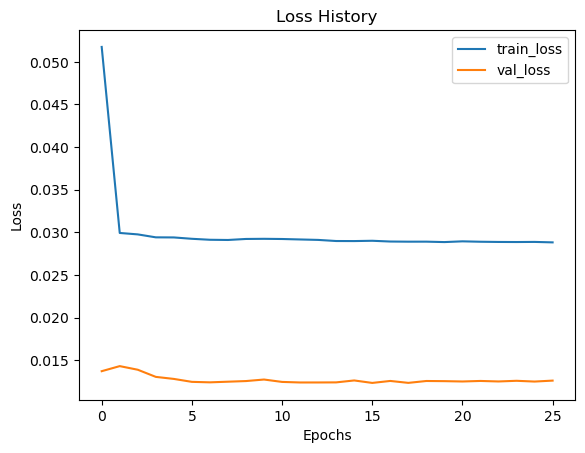

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

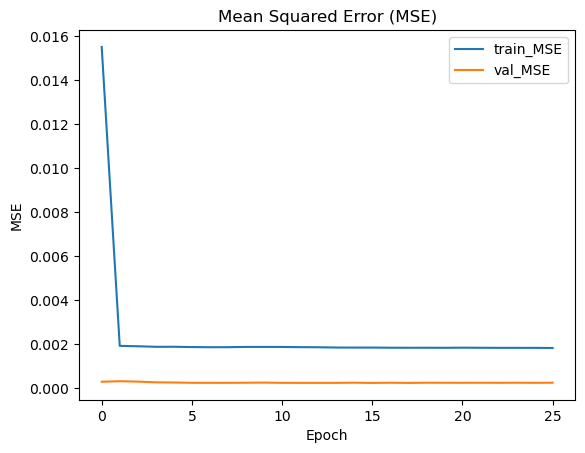

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

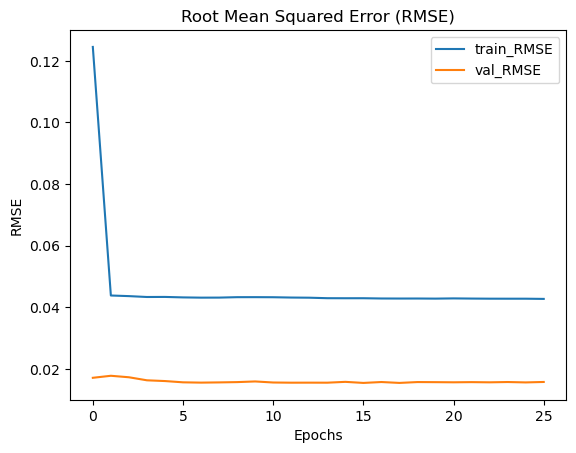

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

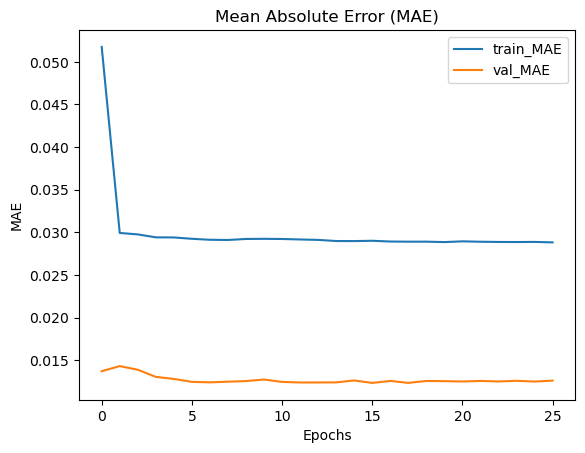

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

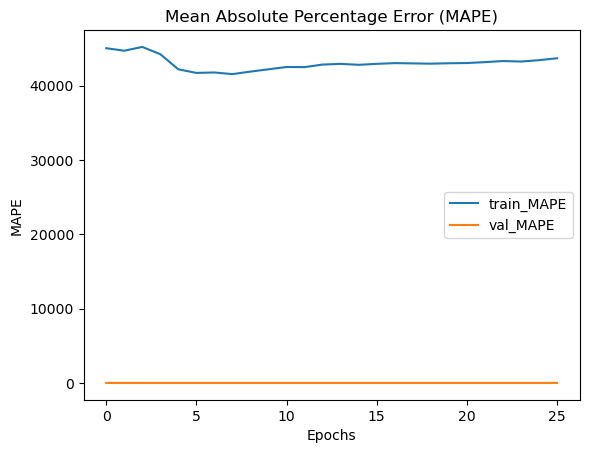

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:33:31.908708: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 1)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


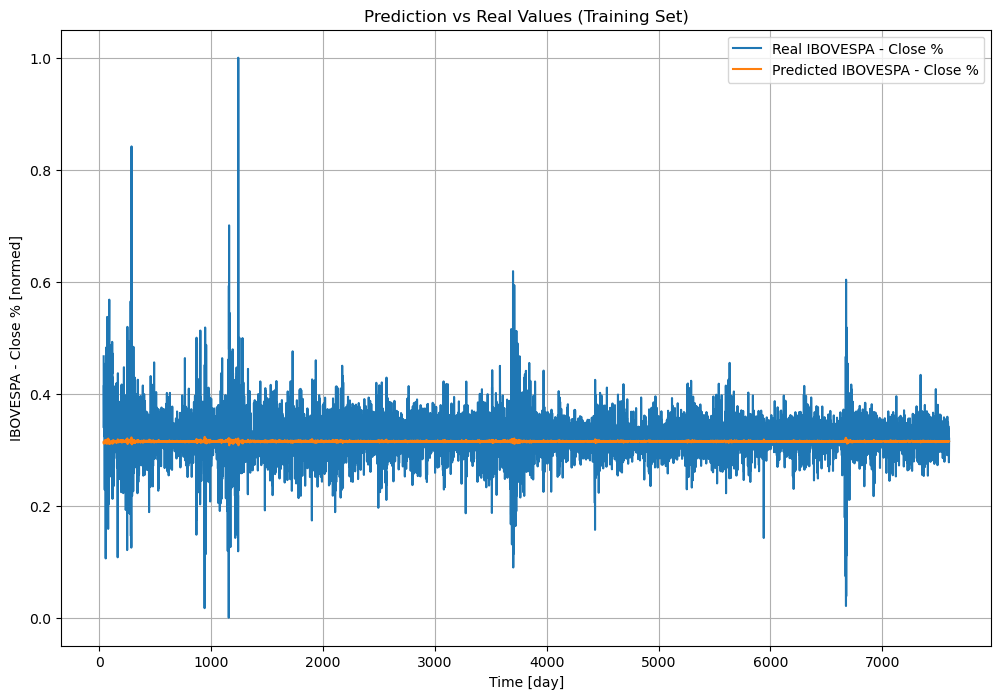

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


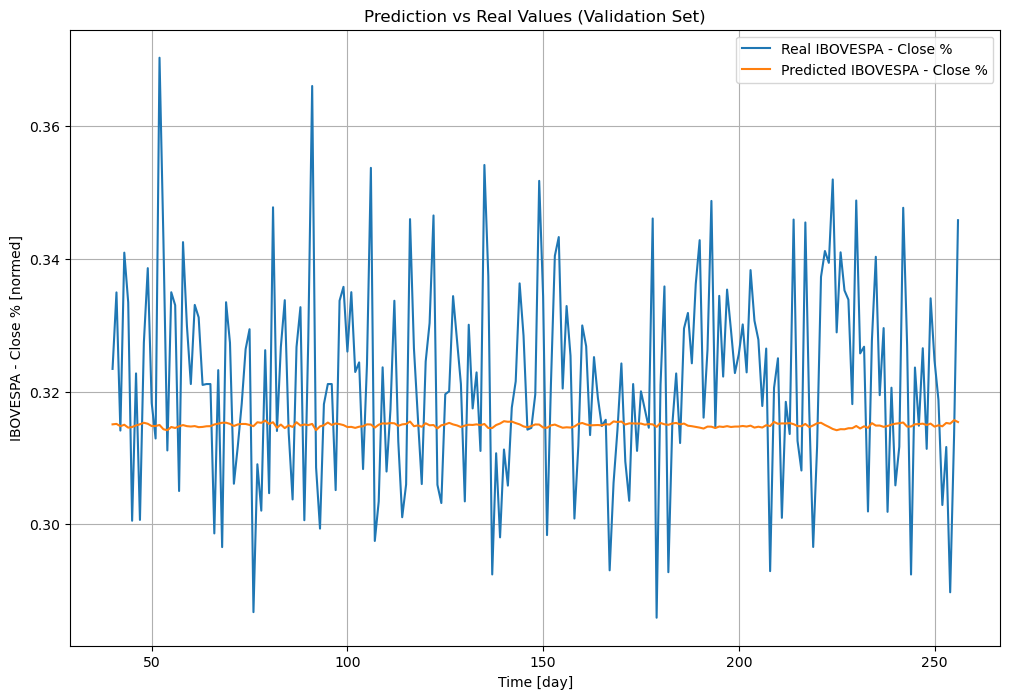

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


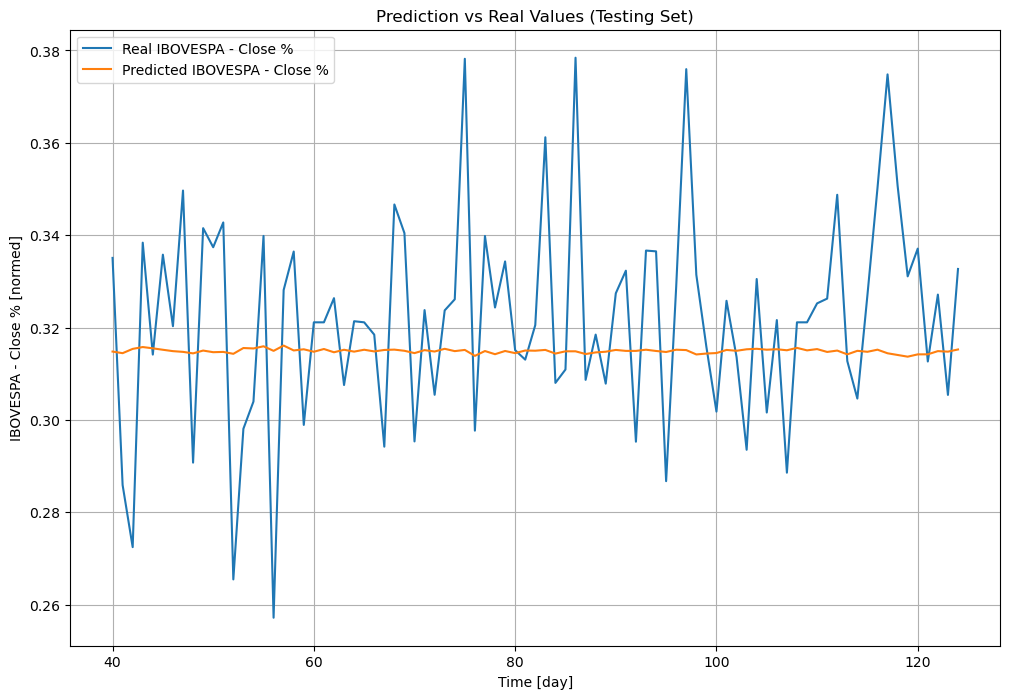

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

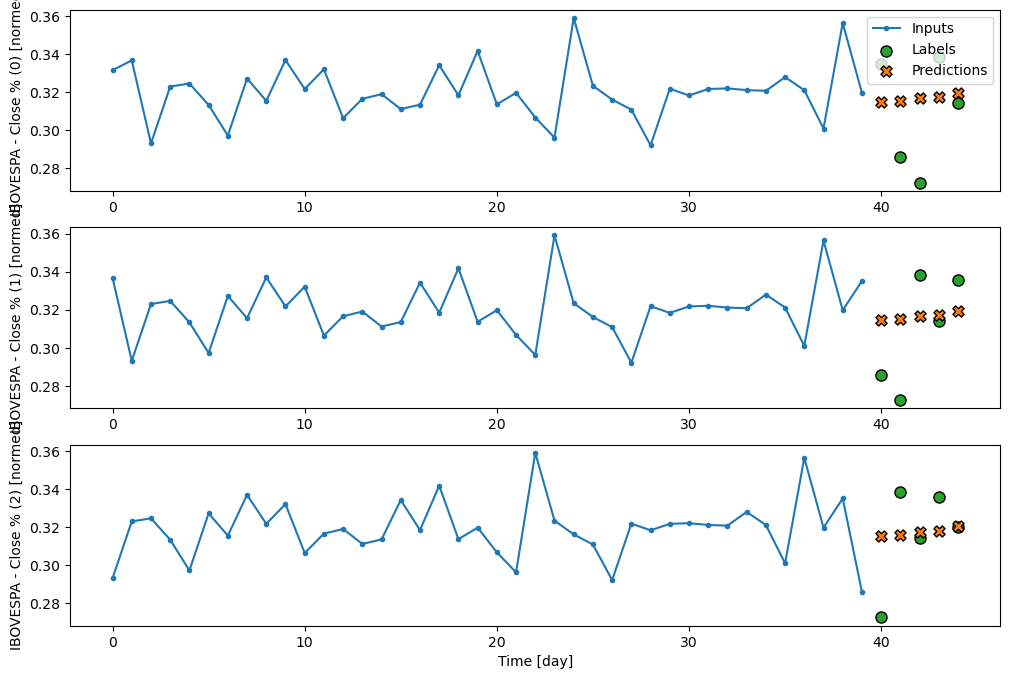

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:59s:304ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[[0.31480795, 0.31480795, 0.31480795, ..., 0.31480795,
         0.31480795, 0.31480795],
        [0.3156572 , 0.3156572 , 0.3156572 , ..., 0.3156572 ,
         0.3156572 , 0.3156572 ],
        [0.31720275, 0.31720275, 0.31720275, ..., 0.31720275,
         0.31720275, 0.31720275],
        [0.31739542, 0.31739542, 0.31739542, ..., 0.31739542,
         0.31739542, 0.31739542],
        [0.31974888, 0.31974888, 0.31974888, ..., 0.31974888,
         0.31974888, 0.31974888]],

       [[0.31445906, 0.31445906, 0.31445906, ..., 0.31445906,
         0.31445906, 0.31445906],
        [0.3153661 , 0.3153661 , 0.3153661 , ..., 0.3153661 ,
         0.3153661 , 0.3153661 ],
        [0.31686005, 0.31686005, 0.31686005, ..., 0.31686005,
         0.31686005, 0.31686005],
        [0.3170729 , 0.3170729 , 0.3170729 , ..., 0.3170729 ,
         0.3170729 , 0.3170729 ],
        [0.31940538, 0.31940538, 0.31940538, ..., 0.31940538,
         0.31940538, 0.31940538]],

       [[0.31538713, 0.31538713, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')